In [1]:
# import llibraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
vgdata = pd.read_csv("vgsales.csv")

In [3]:
# load first five rows of dataset
vgdata.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# to check the number of rows and columns
vgdata.shape

(16598, 11)

In [5]:
vgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
vgdata.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


In [9]:
# check if null values are present in dataset
vgdata.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
# remove unwanted rows and columns
vgdata = vgdata.dropna()

In [11]:
vgdata.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:
vgdata.shape

(16291, 11)

In [14]:
vgdata.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

##   Exploratory Data Analysis

<BarContainer object of 16291 artists>

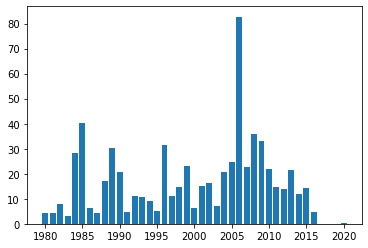

In [15]:
plt.bar('Year','Global_Sales',data=vgdata)

<BarContainer object of 16291 artists>

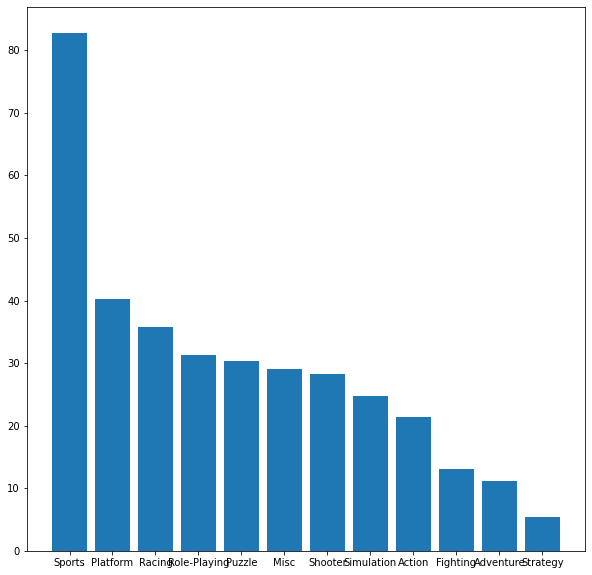

In [17]:
fig=plt.figure(figsize=(10,10))
plt.bar('Genre','Global_Sales',data=vgdata)

<AxesSubplot:ylabel='None'>

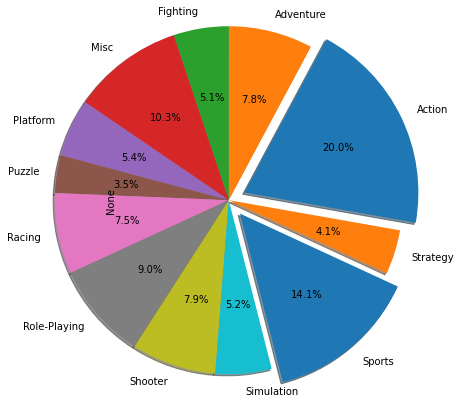

In [18]:
vgdata.groupby('Genre').size().plot.pie(autopct="%1.1f%%",explode=(0.2,0,0,0,0,0,0,0,0,0,0.2,0),radius=2,startangle=350,shadow=True)

<AxesSubplot:xlabel='Genre', ylabel='count'>

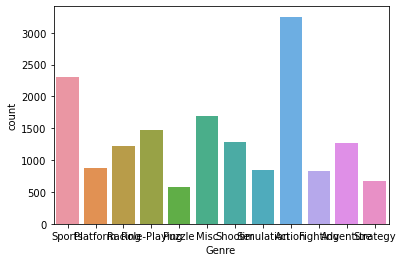

In [19]:
sns.countplot(x='Genre',data=vgdata)

<AxesSubplot:xlabel='Genre'>

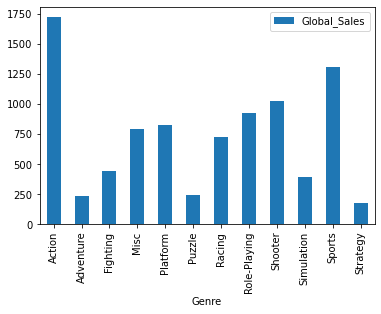

In [21]:
vgdata.groupby('Genre')['Global_Sales'].sum().plot(kind='bar',legend='Global Sales')

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
vgdata.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [26]:
x=vgdata[['Rank', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
y=vgdata[['Global_Sales']]

In [27]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model=LinearRegression()

In [31]:
model.fit(x_train,y_train)

LinearRegression()

In [32]:
from sklearn.metrics import r2_score 

In [35]:
prediction=model.predict(x_test)

In [36]:
score=r2_score(prediction,y_test)

In [37]:
score

0.9999933279366299